In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

TITLE_FONT_SIZE = 20
LABEL_FONT_SIZE = 18
TICK_FONT_SIZE = 14

## pd.read_csv

In [7]:
# replace here
price_df = pd.read_csv("data/price_2.csv")
tick_list = price_df["tick"].values
price_list = price_df["market_price"].values

## price描画

In [8]:
def vis_tick_price(price_list):
    tick_list = list(range(len(price_list)))
    fig = plt.figure(figsize=(8, 4), dpi=100, tight_layout=True)  # width*height
    ax = fig.add_subplot(111)
    ax.plot(tick_list, price_list)
    ax.set_xlabel("Tick", fontsize=LABEL_FONT_SIZE)
    ax.set_ylabel("Price", fontsize=LABEL_FONT_SIZE)
    ax.tick_params(labelsize=TICK_FONT_SIZE)
    # fig_path = self.OUTPUT_DIR_PATH + "/tick_price.png"
    # plt.savefig(fig_path)
    plt.show()

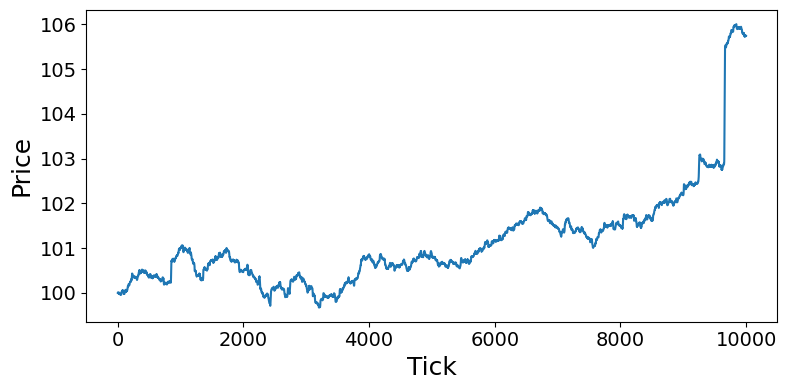

In [9]:
vis_tick_price(price_list)

## CDF of Volatility

In [10]:
def vis_volatility(price_list, scale="log", theory=False):
    dp_list = np.diff(price_list)
    vo_list = np.abs(dp_list)
    cdf_x = np.sort(vo_list)
    cdf_y = [1 - i/len(cdf_x) for i in range(len(cdf_x))]

    fig = plt.figure(figsize=(6, 5), dpi=100, tight_layout=True)  # width*height
    ax = fig.add_subplot(111)
    ax.plot(cdf_x, cdf_y, label="simulation")
    ax.set_xlabel(r"$|\Delta p|$", fontsize=LABEL_FONT_SIZE)
    ax.set_ylabel("CDF", fontsize=LABEL_FONT_SIZE)
    ax.tick_params(labelsize=TICK_FONT_SIZE)
    if scale == "log":
        ax.set_xscale("log")
        ax.set_yscale("log")
    elif scale == "semi":
        ax.set_yscale("log")
    # fig_path = self.OUTPUT_DIR_PATH + "/cdf_volatility_{}.png".format(scale)
    # plt.savefig(fig_path)
    plt.show()

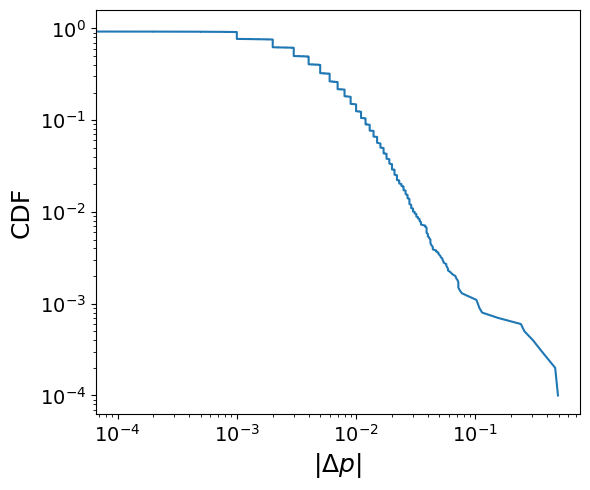

In [11]:
vis_volatility(price_list, "log")

## Autocorrelation of $\Delta P$

In [12]:
def vis_auto_correlation(price_list, K=20):
    dp_list = np.diff(price_list)
    c0 = np.var(dp_list)
    auto = [(np.mean(dp_list[:-k]*dp_list[k:]) - np.mean(dp_list[:-k])*np.mean(dp_list[k:])) / c0 for k in range(1, K)]
    x = range(K)
    y = [1] + auto
    fig = plt.figure(figsize=(6, 5), dpi=100, tight_layout=True)  # width*height
    ax = fig.add_subplot(111)
    ax.plot(x, y)
    ax.set_title(r"Auto correlation of $\Delta p$", fontsize=TITLE_FONT_SIZE)
    ax.set_xlabel(r"$Lag K$", fontsize=LABEL_FONT_SIZE)
    ax.set_ylabel("auto correlation", fontsize=LABEL_FONT_SIZE)
    ax.tick_params(labelsize=TICK_FONT_SIZE)
    plt.show()

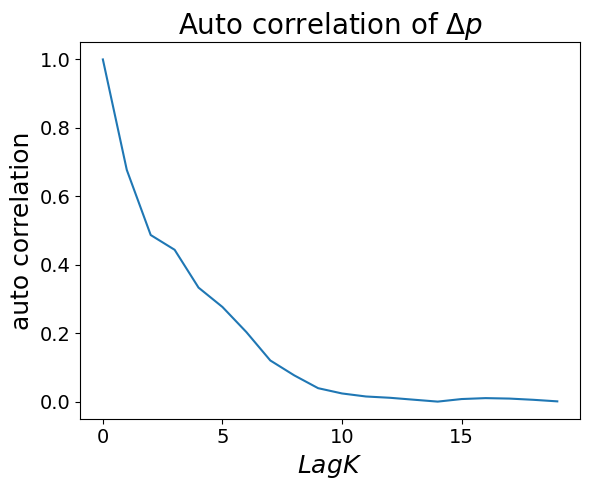

In [13]:
vis_auto_correlation(price_list)